In [42]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
# Load datasets
load_data = pd.read_excel('C:\\Users\death\\Desktop\\btech proj\\DATA SET USED IN THE CONFERENCE PAPER TITLED SHORT-TERM LOAD FORECASTING USING AN LSTM NEURAL NETWORK\\DataSet\\LoadTexasERCOT.xlsx')
weather_data1 = pd.read_excel('C:\\Users\\death\Desktop\\btech proj\\DATA SET USED IN THE CONFERENCE PAPER TITLED SHORT-TERM LOAD FORECASTING USING AN LSTM NEURAL NETWORK\\DataSet\\WeatherStation1.xlsx')
weather_data2 = pd.read_excel('C:\\Users\\death\Desktop\\btech proj\\DATA SET USED IN THE CONFERENCE PAPER TITLED SHORT-TERM LOAD FORECASTING USING AN LSTM NEURAL NETWORK\\DataSet\\WeatherStation2.xlsx')
weather_data3 = pd.read_excel('C:\\Users\\death\Desktop\\btech proj\\DATA SET USED IN THE CONFERENCE PAPER TITLED SHORT-TERM LOAD FORECASTING USING AN LSTM NEURAL NETWORK\\DataSet\\WeatherStation3.xlsx')

target = 'WEST'
weather_data1.head(5) , weather_data2.head(5) , weather_data3.head(5)

<>:15: SyntaxWarning: invalid escape sequence '\d'
<>:16: SyntaxWarning: invalid escape sequence '\D'
<>:17: SyntaxWarning: invalid escape sequence '\D'
<>:18: SyntaxWarning: invalid escape sequence '\D'
<>:15: SyntaxWarning: invalid escape sequence '\d'
<>:16: SyntaxWarning: invalid escape sequence '\D'
<>:17: SyntaxWarning: invalid escape sequence '\D'
<>:18: SyntaxWarning: invalid escape sequence '\D'
C:\Users\death\AppData\Local\Temp\ipykernel_19332\1115631666.py:15: SyntaxWarning: invalid escape sequence '\d'
  load_data = pd.read_excel('C:\\Users\death\\Desktop\\btech proj\\DATA SET USED IN THE CONFERENCE PAPER TITLED SHORT-TERM LOAD FORECASTING USING AN LSTM NEURAL NETWORK\\DataSet\\LoadTexasERCOT.xlsx')
C:\Users\death\AppData\Local\Temp\ipykernel_19332\1115631666.py:16: SyntaxWarning: invalid escape sequence '\D'
  weather_data1 = pd.read_excel('C:\\Users\\death\Desktop\\btech proj\\DATA SET USED IN THE CONFERENCE PAPER TITLED SHORT-TERM LOAD FORECASTING USING AN LSTM NEURAL NE

(   Year  Month  Day  Hour  Minute  Relative Humidity  Temperature  Pressure
 0  2012      1    1     0      30              39.19            6       950
 1  2012      1    1     1      30              44.45            5       950
 2  2012      1    1     2      30              53.94            4       950
 3  2012      1    1     3      30              63.77            2       960
 4  2012      1    1     4      30              71.93            2       960,
    Year  Month  Day  Hour  Minute  Relative Humidity  Temperature  Pressure
 0  2012      1    1     0      30              63.98            8       950
 1  2012      1    1     1      30              49.59            6       950
 2  2012      1    1     2      30              46.28            4       950
 3  2012      1    1     3      30              52.89            3       960
 4  2012      1    1     4      30              62.81            3       960,
    Year  Month  Day  Hour  Minute  Relative Humidity  Temperature  Pressu

In [43]:
import pandas as pd

# Assuming weather_data1 is already defined and contains the necessary data

# Print column names to verify
print("Columns in weather_data1:", weather_data1.columns)

# Step 1: Preprocessing
# Convert to Datetime
weather_data1['DateTime'] = pd.to_datetime(weather_data1[['Year', 'Month', 'Day', 'Hour' ]])

# Drop the original columns
weather_data1.drop(columns=['Year', 'Month', 'Day', 'Hour' ], inplace=True)

# Display the first few rows to verify the changes
weather_data3['DateTime'] = pd.to_datetime(weather_data2[['Year', 'Month', 'Day', 'Hour']])
weather_data3.drop(columns=['Year', 'Month', 'Day', 'Hour'], inplace=True)
weather_data2['DateTime'] = pd.to_datetime(weather_data2[['Year', 'Month', 'Day', 'Hour']])
weather_data2.drop(columns=['Year', 'Month', 'Day', 'Hour'], inplace=True)
load_data.drop(columns=[col for col in load_data.columns if col not in ['Hour_End', target]], inplace=True)
weather_data1.shape  , weather_data2.shape , weather_data3.shape , load_data.shape

Columns in weather_data1: Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Relative Humidity',
       'Temperature', 'Pressure'],
      dtype='object')


((35064, 5), (35064, 5), (35064, 5), (35064, 2))

In [44]:
import pandas as pd

# Assuming weather_data1, weather_data2, and weather_data3 are your DataFrames

# Ensure DateTime columns are in datetime format

# Concatenate the three dataframes on top of each other
combined_df = pd.concat([weather_data1, weather_data2, weather_data3])

# Group by the DateTime column and calculate the mean for all other columns
result_df = combined_df.groupby('DateTime').mean().reset_index()

# Now, result_df contains the DateTime column and averaged values for all other columns
#now merge result df on DateTime with load data on Hour_End 
final_df = pd.merge(result_df, load_data, left_on='DateTime', right_on='Hour_End')
result_df = final_df

In [45]:
result_df.shape

(11687, 7)

In [46]:
weather_data1.shape , weather_data2.shape , weather_data3.shape , result_df.shape

((35064, 5), (35064, 5), (35064, 5), (11687, 7))

In [47]:
# merged_data2 = pd.merge(load_data, weather_data3, left_on='Hour_End', right_on='DateTime')
# merged_data2

In [48]:
# merged_data3 = pd.merge(load_data, weather_data2, left_on='Hour_End', right_on='DateTime' )
# merged_data3

In [49]:
# stack all 3 mergered dataframes
# final_data = pd.concat([merged_data, merged_data2, merged_data3], axis=0)
# merged_data  = final_data
# #drop the DateTime column
# merged_data.drop(columns=['DateTime'], inplace=True)

merged_data =  result_df
merged_data

,DateTime,Minute,Relative Humidity,Temperature,Pressure,Hour_End,WEST
0,2012-01-01 03:00:00,30.0,62.153333,2.333333,960.000000,2012-01-01 03:00:00,840.902848
1,2012-01-01 06:00:00,30.0,76.233333,0.333333,963.333333,2012-01-01 06:00:00,892.341115
2,2012-01-01 09:00:00,30.0,46.803333,6.333333,963.333333,2012-01-01 09:00:00,1009.202331
3,2012-01-01 12:00:00,30.0,26.700000,12.333333,963.333333,2012-01-01 12:00:00,964.065395
4,2012-01-01 15:00:00,30.0,25.413333,12.000000,963.333333,2012-01-01 15:00:00,895.595594
...,...,...,...,...,...,...,...
11682,2015-12-31 09:00:00,30.0,93.536667,3.666667,953.333333,2015-12-31 09:00:00,1366.707739
11683,2015-12-31 12:00:00,30.0,84.633333,6.333333,953.333333,2015-12-31 12:00:00,1309.101953
11684,2015-12-31 15:00:00,30.0,80.333333,6.000000,953.333333,2015-12-31 15:00:00,1183.585632
11685,2015-12-31 18:00:00,30.0,72.553333,-1.333333,953.333333,2015-12-31 18:00:00,1229.206403


In [50]:
import holidays

us_holidays = holidays.US(years=merged_data['Hour_End'].dt.year.unique(), state='TX')
merged_data['HolidayFlag'] = merged_data['Hour_End'].apply(lambda x: 1 if x in us_holidays else 0)
holiday_flag_1_count = merged_data['HolidayFlag'].sum()
holiday_flag_0_count = len(merged_data) - holiday_flag_1_count

print(f"Number of rows where HolidayFlag_1 is 1: {holiday_flag_1_count}")
print(f"Number of rows where HolidayFlag_1 is 0: {holiday_flag_0_count}")

Number of rows where HolidayFlag_1 is 1: 623
Number of rows where HolidayFlag_1 is 0: 11064


## Creating Input features


In [51]:
import pandas as pd

# Assuming 'merged_data' DataFrame has 'Hour_End' column as datetime object
# Example: merged_data['Hour_End'] = pd.to_datetime(merged_data['Hour_End'])

# Step 1: Add 'Time of Day Index' (Hour of the day)
merged_data['TimeOfDayIndex'] = merged_data['Hour_End'].dt.hour

# Step 2: Add 'Day of the Week Index' (0 = Monday, 6 = Sunday)
merged_data['DayOfWeekIndex'] = merged_data['Hour_End'].dt.dayofweek

# Step 3: Add 'Holiday Flag' using the 'holidays' library for U.S. and Texas holidays

# Step 4: Manually create 24 columns for 'TimeOfDayIndex' and 7 columns for 'DayOfWeekIndex'
for hour in range(24):
    merged_data[f'TimeOfDay_{hour}'] = (merged_data['TimeOfDayIndex'] == hour).astype(int)

for day in range(7):
    merged_data[f'DayOfWeek_{day}'] = (merged_data['DayOfWeekIndex'] == day).astype(int)

# Drop the original 'TimeOfDayIndex' and 'DayOfWeekIndex' columns
merged_data.drop(columns=['TimeOfDayIndex', 'DayOfWeekIndex'], inplace=True)

# Drop 'DateTime' column if it exists
if 'DateTime' in merged_data.columns:
    merged_data.drop(['DateTime'], axis=1, inplace=True)

# Display the first few rows to verify the manually created features
print(merged_data.head())

# Count the number of rows where 'HolidayFlag' is 1 and 0
# Display the column names to verify the new columns
print('Column names are:\n' + ', '.join(merged_data.columns))
print('shape of the data is:', merged_data.shape)

   Minute  Relative Humidity  Temperature    Pressure            Hour_End  \
0    30.0          62.153333     2.333333  960.000000 2012-01-01 03:00:00   
1    30.0          76.233333     0.333333  963.333333 2012-01-01 06:00:00   
2    30.0          46.803333     6.333333  963.333333 2012-01-01 09:00:00   
3    30.0          26.700000    12.333333  963.333333 2012-01-01 12:00:00   
4    30.0          25.413333    12.000000  963.333333 2012-01-01 15:00:00   

          WEST  HolidayFlag  TimeOfDay_0  TimeOfDay_1  TimeOfDay_2  ...  \
0   840.902848            1            0            0            0  ...   
1   892.341115            1            0            0            0  ...   
2  1009.202331            1            0            0            0  ...   
3   964.065395            1            0            0            0  ...   
4   895.595594            1            0            0            0  ...   

   TimeOfDay_21  TimeOfDay_22  TimeOfDay_23  DayOfWeek_0  DayOfWeek_1  \
0            

In [52]:
# # print the  range of each column numerical and categorical min and max 
# print('Numerical Features Range:')
# print(merged_data[numerical_features].min())
# print(merged_data[numerical_features].max())
# print('Categorical Features Range:')
# print(merged_data[categorical_features].min())
# print(merged_data[categorical_features].max())


## Building the l ass tm model

In [53]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assuming load_data is your DataFrame and 'target' is the name of your target column
numerical_features = ['Pressure', 'Relative Humidity', 'Temperature']  # replace with your numerical feature names
other_features = [col for col in load_data.columns if col not in numerical_features + [target]]

# Initialize the scalers
num_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

# Scale the numerical features
merged_data[numerical_features] = num_scaler.fit_transform(merged_data[numerical_features])

# Scale the target
merged_data[target] = target_scaler.fit_transform(merged_data[[target]])

# Store the result in scaled_data
scaled_data = merged_data.copy()

# Display the transformed DataFrame
print(merged_data)

       Minute  Relative Humidity  Temperature  Pressure            Hour_End  \
0        30.0           0.586586     0.201389  0.692308 2012-01-01 03:00:00   
1        30.0           0.740387     0.159722  0.769231 2012-01-01 06:00:00   
2        30.0           0.418912     0.284722  0.769231 2012-01-01 09:00:00   
3        30.0           0.199315     0.409722  0.769231 2012-01-01 12:00:00   
4        30.0           0.185261     0.402778  0.769231 2012-01-01 15:00:00   
...       ...                ...          ...       ...                 ...   
11682    30.0           0.929398     0.229167  0.538462 2015-12-31 09:00:00   
11683    30.0           0.832144     0.284722  0.538462 2015-12-31 12:00:00   
11684    30.0           0.785173     0.277778  0.538462 2015-12-31 15:00:00   
11685    30.0           0.700189     0.125000  0.538462 2015-12-31 18:00:00   
11686    30.0           0.760559     0.111111  0.538462 2015-12-31 21:00:00   

           WEST  HolidayFlag  TimeOfDay_0  TimeOfDa

In [54]:
# print the  range of each column numerical and categorical min and max 
categorical_features = [col for col in merged_data.columns if col not in numerical_features and col != target]
print('Numerical Features Range:')
print(merged_data[numerical_features].min())
print(merged_data[numerical_features].max())
print('Categorical Features Range:')
print(merged_data[categorical_features].min())
print(merged_data[categorical_features].max())
print('target Features Range:')
print(merged_data[target].min())
print(merged_data[target].max())
print(merged_data.shape)


Numerical Features Range:
Pressure             0.0
Relative Humidity    0.0
Temperature          0.0
dtype: float64
Pressure             1.0
Relative Humidity    1.0
Temperature          1.0
dtype: float64
Categorical Features Range:
Minute                         30.0
Hour_End        2012-01-01 03:00:00
HolidayFlag                       0
TimeOfDay_0                       0
TimeOfDay_1                       0
TimeOfDay_2                       0
TimeOfDay_3                       0
TimeOfDay_4                       0
TimeOfDay_5                       0
TimeOfDay_6                       0
TimeOfDay_7                       0
TimeOfDay_8                       0
TimeOfDay_9                       0
TimeOfDay_10                      0
TimeOfDay_11                      0
TimeOfDay_12                      0
TimeOfDay_13                      0
TimeOfDay_14                      0
TimeOfDay_15                      0
TimeOfDay_16                      0
TimeOfDay_17                      0
TimeOfDay_

In [55]:
def split_data(df):
    # Ensure hour_end is a datetime column
    df['Hour_End'] = pd.to_datetime(df['Hour_End'])
    
    # Split the data
    train = df[df['Hour_End'].dt.year != 2015]
    test = df[df['Hour_End'].dt.year == 2015]
    
    return train, test
tr , te = split_data(scaled_data)
print(tr.shape)
#drop the Hour_End column from tr and te
tr.drop(columns=['Hour_End'], inplace=True)
te.drop(columns=['Hour_End'], inplace=True)
print(tr.shape, te.shape)
tr.head(5)

(8767, 38)
(8767, 37) (2920, 37)


C:\Users\death\AppData\Local\Temp\ipykernel_19332\4094146640.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr.drop(columns=['Hour_End'], inplace=True)
C:\Users\death\AppData\Local\Temp\ipykernel_19332\4094146640.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  te.drop(columns=['Hour_End'], inplace=True)


,Minute,Relative Humidity,Temperature,Pressure,WEST,HolidayFlag,TimeOfDay_0,TimeOfDay_1,TimeOfDay_2,TimeOfDay_3,...,TimeOfDay_21,TimeOfDay_22,TimeOfDay_23,DayOfWeek_0,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6
0,30.0,0.586586,0.201389,0.692308,0.168452,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,30.0,0.740387,0.159722,0.769231,0.209891,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,30.0,0.418912,0.284722,0.769231,0.304035,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,30.0,0.199315,0.409722,0.769231,0.267673,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,30.0,0.185261,0.402778,0.769231,0.212513,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [56]:
print(te.shape)
te.head(5)

(2920, 37)


,Minute,Relative Humidity,Temperature,Pressure,WEST,HolidayFlag,TimeOfDay_0,TimeOfDay_1,TimeOfDay_2,TimeOfDay_3,...,TimeOfDay_21,TimeOfDay_22,TimeOfDay_23,DayOfWeek_0,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6
8767,30.0,0.768788,0.125000,0.538462,0.703001,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8768,30.0,0.805236,0.131944,0.538462,0.643432,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
8769,30.0,0.832836,0.131944,0.538462,0.657032,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8770,30.0,0.801704,0.145833,0.538462,0.718336,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8771,30.0,0.817106,0.173611,0.538462,0.742422,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [57]:
# scaled_data = scaled_data.astype(np.float64)

# Function to create sequences
def create_sequences(data, time_steps, target):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data.iloc[i:i + time_steps].drop(columns=[target]).values)
        y.append(data.iloc[i + time_steps][target])
    return np.array(X), np.array(y)

# Assuming scaled_data is already defined and contains the necessary data
time_steps = 18  # Example time steps
target = target
X_train, y_train = create_sequences(tr, time_steps, target)
X_test,  y_test = create_sequences(te, time_steps, target)



# Ensure all data is of type float64
X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)
y_train = y_train.astype(np.float64)
y_test = y_test.astype(np.float64)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

def train_and_evaluate_model(X_train, y_train, X_test, y_test, max_epochs=50, batch_sizes=[32]):
    # Initialize variables to store the best results
    best_train_mae = float('inf')
    best_test_mae = float('inf')
    best_train_rmse = float('inf')
    best_test_rmse = float('inf')
    best_train_r2 = float('-inf')
    best_test_r2 = float('-inf')
    best_model = None
    best_epoch = 0
    best_batch_size = 0
    best_test_predictions = None
    best_train_predictions = None

    # Loop through the number of epochs and batch sizes
    for epoch in [5,30,15]:
        for batch_size in [64]:
            # Define the model
            model = Sequential()
            model.add(LSTM(55, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
            model.add(Dropout(0.2))
            model.add(LSTM(50))
            model.add(Dropout(0.2))
            model.add(Dense(1))  # Output layer for load prediction

            # Compile the model
            model.compile(optimizer='adam', loss='mse')

            # Train the model for the current number of epochs and batch size
            model.fit(X_train, y_train, epochs=epoch, batch_size=batch_size, validation_data=(X_test, y_test), verbose=0)

            # Make predictions
            train_predictions = model.predict(X_train)
            test_predictions = model.predict(X_test)

            # Inverse transform the predictions and target variables
            train_predictions = target_scaler.inverse_transform(train_predictions)
            test_predictions = target_scaler.inverse_transform(test_predictions)
            y_train_inv = target_scaler.inverse_transform(y_train.reshape(-1, 1))
            y_test_inv = target_scaler.inverse_transform(y_test.reshape(-1, 1))

            # Calculate metrics
            train_mae = mean_absolute_error(y_train_inv, train_predictions)
            test_mae = mean_absolute_error(y_test_inv, test_predictions)
            train_rmse = np.sqrt(mean_squared_error(y_train_inv, train_predictions))
            test_rmse = np.sqrt(mean_squared_error(y_test_inv, test_predictions))
            train_r2 = r2_score(y_train_inv, train_predictions)
            test_r2 = r2_score(y_test_inv, test_predictions)

            # Update best metrics and model if applicable
            if test_mae < best_test_mae:
                best_train_mae = train_mae
                best_test_mae = test_mae
                best_train_rmse = train_rmse
                best_test_rmse = test_rmse
                best_train_r2 = train_r2
                best_test_r2 = test_r2
                best_model = model
                best_epoch = epoch
                best_batch_size = batch_size
                best_train_predictions = train_predictions
                best_test_predictions = test_predictions

            print(f"Epoch {epoch}, Batch Size {batch_size}: Train MAE = {train_mae:.4f}, Test MAE = {test_mae:.4f}")
            print(f"Epoch {epoch}, Batch Size {batch_size}: Train RMSE = {train_rmse:.4f}, Test RMSE = {test_rmse:.4f}")
            print(f"Epoch {epoch}, Batch Size {batch_size}: Train R² = {train_r2:.4f}, Test R² = {test_r2:.4f}")

    # Final evaluation metrics
    print(f"Best Epoch: {best_epoch}")
    print(f"Best Batch Size: {best_batch_size}")
    print(f"Best Train MAE: {best_train_mae:.4f}")
    print(f"Best Test MAE: {best_test_mae:.4f}")
    print(f"Best Train RMSE: {best_train_rmse:.4f}")
    print(f"Best Test RMSE: {best_test_rmse:.4f}")
    print(f"Best Train R²: {best_train_r2:.4f}")
    print(f"Best Test R²: {best_test_r2:.4f}")

    # Return the best model and the metrics
    return best_model, best_train_mae, best_test_mae, best_train_rmse, best_test_rmse, best_train_r2, best_test_r2, best_train_predictions, best_test_predictions

# Example usage:
model, train_mae, test_mae, train_rmse, test_rmse, train_r2, test_r2, train_predictions, test_predictions = train_and_evaluate_model(X_train, y_train, X_test, y_test, max_epochs=50, batch_sizes=[16, 32, 64])

C:\Users\death\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Epoch 5, Batch Size 64: Train MAE = 80.7312, Test MAE = 75.0635
Epoch 5, Batch Size 64: Train RMSE = 104.6088, Test RMSE = 99.9593
Epoch 5, Batch Size 64: Train R² = 0.7878, Test R² = 0.8178


C:\Users\death\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Calculate the range of y_train, y_test, train_predictions, and test_predictions
y_train_min, y_train_max = y_train.min(), y_train.max()
y_test_min, y_test_max = y_test.min(), y_test.max()
train_predictions_min, train_predictions_max = train_predictions.min(), train_predictions.max()
test_predictions_min, test_predictions_max = test_predictions.min(), test_predictions.max()

# Print the ranges
print('Range of y_train: Min =', y_train_min, ', Max =', y_train_max)
print('Range of y_test: Min =', y_test_min, ', Max =', y_test_max)
print('Range of train_predictions: Min =', train_predictions_min, ', Max =', train_predictions_max)
print('Range of test_predictions: Min =', test_predictions_min, ', Max =', test_predictions_max)

Range of y_train: Min = 0.0 , Max = 0.9772066444765259
Range of y_test: Min = 0.0830262440971743 , Max = 1.0
Range of train_predictions: Min = 963.1841 , Max = 1083.7063
Range of test_predictions: Min = 964.9256 , Max = 1085.4304


In [ ]:
y_train = target_scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = target_scaler.inverse_transform(y_test.reshape(-1, 1))
# Calculate the range of y_train, y_test, train_predictions, and test_predictions
y_train_min, y_train_max = y_train.min(), y_train.max()
y_test_min, y_test_max = y_test.min(), y_test.max()
train_predictions_min, train_predictions_max = train_predictions.min(), train_predictions.max()
test_predictions_min, test_predictions_max = test_predictions.min(), test_predictions.max()

# Print the ranges
print('Range of y_train: Min =', y_train_min, ', Max =', y_train_max)
print('Range of y_test: Min =', y_test_min, ', Max =', y_test_max)
print('Range of train_predictions: Min =', train_predictions_min, ', Max =', train_predictions_max)
print('Range of test_predictions: Min =', test_predictions_min, ', Max =', test_predictions_max)

Range of y_train: Min = 631.803701763546 , Max = 1844.8092489499652
Range of y_test: Min = 734.864088449594 , Max = 1873.1026164226937
Range of train_predictions: Min = 963.1841 , Max = 1083.7063
Range of test_predictions: Min = 964.9256 , Max = 1085.4304


Training MAE: 169.1180770321508, RMSE: 225.3867022829543, R²: 0.01486391963197442
Testing MAE: 180.92312793360924, RMSE: 247.3715257236407, R²: -0.11598547059729203


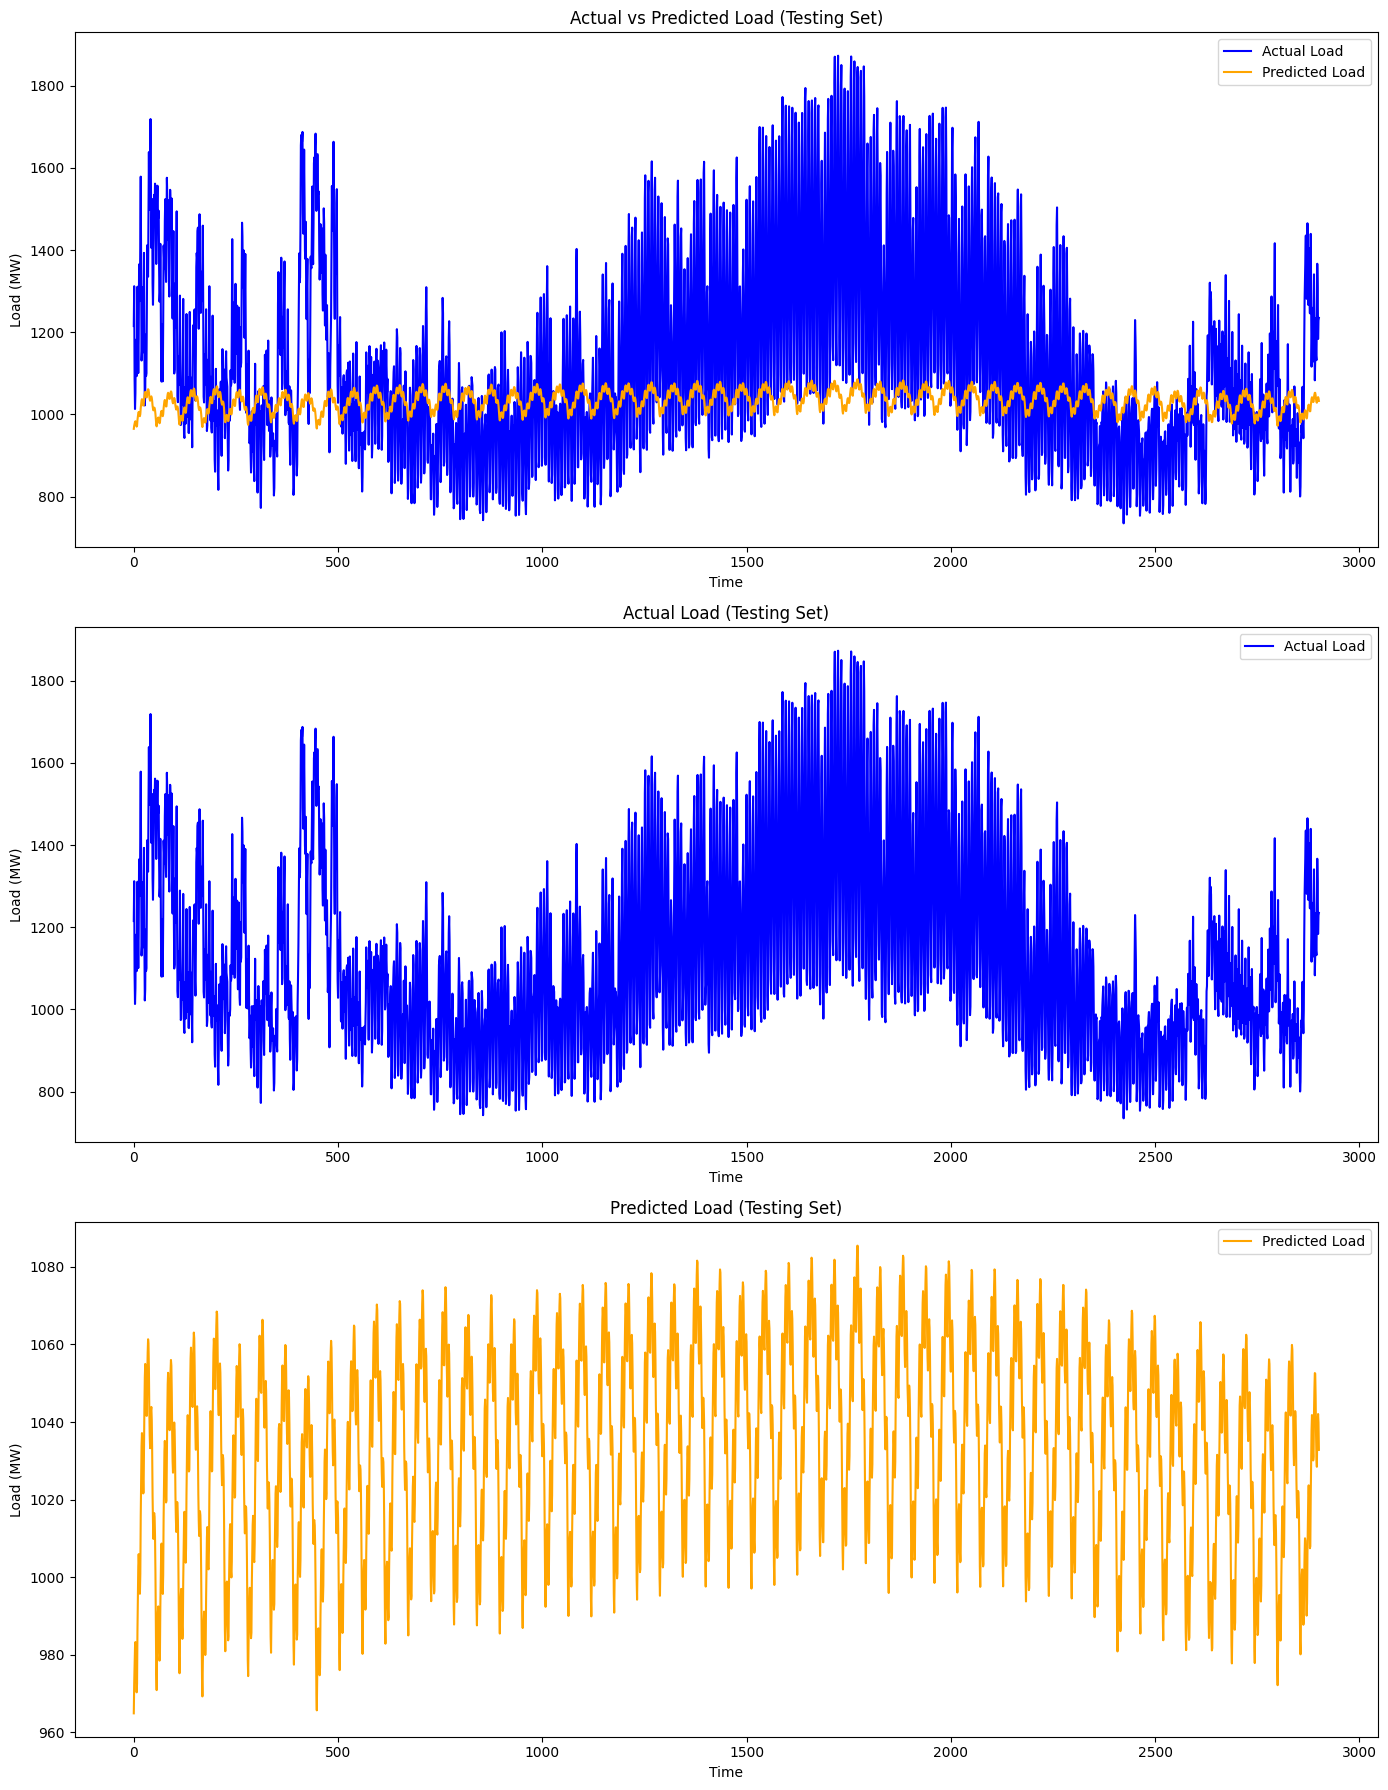

In [ ]:


train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

print(f'Training MAE: {train_mae}, RMSE: {train_rmse}, R²: {train_r2}')
print(f'Testing MAE: {test_mae}, RMSE: {test_rmse}, R²: {test_r2}')

# Plotting the results
plt.figure(figsize=(14, 18))
plt.subplot(3, 1, 1)
plt.plot(y_test, label='Actual Load', color='blue')
plt.plot(test_predictions, label='Predicted Load', color='orange')
plt.title('Actual vs Predicted Load (Testing Set)')
plt.xlabel('Time')
plt.ylabel('Load (MW)')
plt.legend()
plt.subplot(3, 1, 2)
plt.plot(y_test, label='Actual Load', color='blue')
plt.title('Actual Load (Testing Set)')
plt.xlabel('Time')
plt.ylabel('Load (MW)')
plt.legend()
plt.subplot(3, 1, 3)
plt.plot(test_predictions, label='Predicted Load', color='orange')
plt.title('Predicted Load (Testing Set)')
plt.xlabel('Time')
plt.ylabel('Load (MW)')
plt.legend()
plt.tight_layout()
plt.show()